# Process of results

First some imports

In [1]:
import os
import os.path

from gravann.input import csv_reader
from gravann.functions import unit_conversion

from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

import ast
import warnings
warnings.filterwarnings('ignore')

Next, we read all finalized CSV files from the given `input_directory`:

In [2]:
input_directory = Path("./results/eros")
output_directory = Path("./results/eros")

# Error of interest
error_of_interest = "relRMSE"

df = csv_reader.read_result_csv(
    input_directory,
    include=["results.csv"],
    exclude=["checkpoint", "validation"]
)

# Nearly finished runs
# df = pd.concat(
#     [
#         df,
#         pd.read_csv(Path("results/eros/polyhedral-total-eros-seed-9/results_checkpoint_0025.csv")),
#         pd.read_csv(Path("results/eros/polyhedral-total-eros-seed-37/results_checkpoint_0026.csv"))
#     ],
#     ignore_index=True
# )

analysis_df = df.copy()

Let's look at the initial result

In [3]:
df

,sample,output_folder,run_id,plotting_points,seed,ground_truth,loss,batch_size,learning_rate,iterations,...,RMSE@Altitude_9,relRMSE@Altitude_9,Normalized L1 Loss@High Altitude,Normalized Relative Component Loss@High Altitude,RMSE@High Altitude,relRMSE@High Altitude,Normalized L1 Loss@Low Altitude,Normalized Relative Component Loss@Low Altitude,RMSE@Low Altitude,relRMSE@Low Altitude
0,eros,results/polyhedral-total-eros-seed-99,0,2500,99,polyhedral,normalized_L1_loss,1000,0.0001,10000,...,1.849360e-08,0.000047,0.016695,0.013105,0.061712,0.015428,0.058061,0.037774,0.375479,0.077470
1,eros,results/polyhedral-total-eros-seed-99,1,2500,99,polyhedral,normalized_L1_loss,1000,0.0001,10000,...,3.309005e-08,0.000084,1.098487,0.873947,4.185545,1.090859,1.565925,1.045792,5.525599,1.243397
2,eros,results/polyhedral-total-eros-seed-99,2,2500,99,polyhedral,normalized_L1_loss,1000,0.0001,10000,...,1.461015e-08,0.000037,0.955096,0.773294,3.768435,1.010904,1.336114,0.888446,5.044135,1.140005
3,eros,results/polyhedral-total-eros-seed-99,3,2500,99,polyhedral,normalized_L1_loss,1000,0.0001,10000,...,1.687019e-08,0.000043,0.019349,0.015467,0.071181,0.018291,0.078653,0.051279,0.677076,0.148292
4,eros,results/polyhedral-total-eros-seed-99,4,2500,99,polyhedral,normalized_L1_loss,1000,0.0001,10000,...,1.464729e-07,0.000373,1.074353,0.851791,4.146062,1.066620,1.413111,0.940060,5.229461,1.175274
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
355,eros,results/polyhedral-total-eros-seed-3,31,2500,3,mascon,normalized_L1_loss,1000,0.0001,10000,...,6.831183e-08,0.000174,1.041475,0.826453,4.060433,1.050722,1.379457,0.915699,5.170766,1.164289
356,eros,results/polyhedral-total-eros-seed-3,32,2500,3,mascon,normalized_L1_loss,1000,0.0001,10000,...,2.450623e-07,0.000625,1.261303,1.016095,4.493940,1.188220,1.678150,1.124048,5.777147,1.300937
357,eros,results/polyhedral-total-eros-seed-3,33,2500,3,mascon,normalized_L1_loss,1000,0.0001,10000,...,1.423787e-08,0.000036,0.029590,0.023267,0.108874,0.027379,0.104203,0.068007,0.801278,0.182255
358,eros,results/polyhedral-total-eros-seed-3,34,2500,3,mascon,normalized_L1_loss,1000,0.0001,10000,...,1.802317e-07,0.000460,1.449515,1.155138,4.926024,1.273666,1.892655,1.271097,6.152024,1.374689


And save the unmodified concatenated DataFrame to a file

In [4]:
filename = "total_results_eros.csv"
df.to_csv(output_directory.joinpath(filename))

# Processing and Data Visualization

First, we drop every uninteresting parameter and focus on the selected error. Further, we rember the used altitudes for validation.

In [5]:
interesting_columns = ["sample", "seed", "ground_truth", "sample_domain", "noise"]
interesting_columns.extend([col for col in df if col.startswith(error_of_interest)])

analysis_df = analysis_df[interesting_columns]
analysis_df = analysis_df.fillna("None")
analysis_df

,sample,seed,ground_truth,sample_domain,noise,relRMSE@Altitude_0,relRMSE@Altitude_1,relRMSE@Altitude_2,relRMSE@Altitude_3,relRMSE@Altitude_4,relRMSE@Altitude_5,relRMSE@Altitude_6,relRMSE@Altitude_7,relRMSE@Altitude_8,relRMSE@Altitude_9,relRMSE@High Altitude,relRMSE@Low Altitude
0,eros,99,polyhedral,"[0.0, 1.0]",[''],0.086134,0.059445,0.043693,0.015542,0.009219,0.002914,0.001856,0.000433,0.000227,0.000047,0.015428,0.077470
1,eros,99,polyhedral,"[1.0, 3.0]",[''],0.775183,0.891804,1.068034,0.978371,0.821851,0.347013,0.022881,0.000766,0.000403,0.000084,1.090859,1.243397
2,eros,99,polyhedral,"[3.0, 5.0]",[''],0.760275,0.782618,0.970073,0.979084,0.932638,0.386645,0.038140,0.000361,0.000186,0.000037,1.010904,1.140005
3,eros,99,polyhedral,"[0.0, 1.0]","['gaussian', 0.0, 0.009337]",0.101323,0.080166,0.055304,0.017925,0.010307,0.003113,0.002473,0.000399,0.000210,0.000043,0.018291,0.148292
4,eros,99,polyhedral,"[1.0, 3.0]","['gaussian', 0.0, 0.009337]",1.216482,0.755219,0.797864,0.695317,0.635229,0.387723,0.053565,0.003579,0.001854,0.000373,1.066620,1.175274
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
355,eros,3,mascon,"[1.0, 3.0]","['combined', 0.0, 0.009337, [9.79917e-05, 0.0,...",0.850383,0.758364,0.940569,1.469328,0.693935,0.371696,0.046438,0.001763,0.000870,0.000174,1.050722,1.164289
356,eros,3,mascon,"[3.0, 5.0]","['combined', 0.0, 0.009337, [9.79917e-05, 0.0,...",0.931066,1.315456,1.478306,0.815175,0.849750,0.671067,0.292421,0.007507,0.003300,0.000625,1.188220,1.300937
357,eros,3,mascon,"[0.0, 1.0]","['combined', 0.0, 0.093371, [9.79917e-05, 0.0,...",0.203144,0.111831,0.079078,0.027914,0.015924,0.008876,0.008313,0.000464,0.000196,0.000036,0.027379,0.182255
358,eros,3,mascon,"[1.0, 3.0]","['combined', 0.0, 0.093371, [9.79917e-05, 0.0,...",1.401517,1.188715,1.024028,1.006935,1.310923,0.550088,0.149005,0.006030,0.002536,0.000460,1.273666,1.374689


Time to replace the altitudes and make them more readable:

In [6]:
ALTITUDES = ast.literal_eval(df.at[0, "validation_sampling_altitudes"])
print(ALTITUDES)

print(unit_conversion.convert_altitude("eros", np.array([1.0, 3.0, 5.0]), unit='km'))

[0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1.0, 5.0, 10.0, 50.0]
[ 20.41386485  61.24159455 102.06932425]


In [7]:
unit_conversion.convert_pandas_altitudes(analysis_df, ALTITUDES, convert_height=False, only_height=True)
analysis_df

,sample,seed,ground_truth,sample_domain,noise,0.001,0.005,0.01,0.05,0.1,0.5,1.0,5.0,10.0,50.0,relRMSE@High Altitude,relRMSE@Low Altitude
0,eros,99,polyhedral,"[0.0, 1.0]",[''],0.086134,0.059445,0.043693,0.015542,0.009219,0.002914,0.001856,0.000433,0.000227,0.000047,0.015428,0.077470
1,eros,99,polyhedral,"[1.0, 3.0]",[''],0.775183,0.891804,1.068034,0.978371,0.821851,0.347013,0.022881,0.000766,0.000403,0.000084,1.090859,1.243397
2,eros,99,polyhedral,"[3.0, 5.0]",[''],0.760275,0.782618,0.970073,0.979084,0.932638,0.386645,0.038140,0.000361,0.000186,0.000037,1.010904,1.140005
3,eros,99,polyhedral,"[0.0, 1.0]","['gaussian', 0.0, 0.009337]",0.101323,0.080166,0.055304,0.017925,0.010307,0.003113,0.002473,0.000399,0.000210,0.000043,0.018291,0.148292
4,eros,99,polyhedral,"[1.0, 3.0]","['gaussian', 0.0, 0.009337]",1.216482,0.755219,0.797864,0.695317,0.635229,0.387723,0.053565,0.003579,0.001854,0.000373,1.066620,1.175274
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
355,eros,3,mascon,"[1.0, 3.0]","['combined', 0.0, 0.009337, [9.79917e-05, 0.0,...",0.850383,0.758364,0.940569,1.469328,0.693935,0.371696,0.046438,0.001763,0.000870,0.000174,1.050722,1.164289
356,eros,3,mascon,"[3.0, 5.0]","['combined', 0.0, 0.009337, [9.79917e-05, 0.0,...",0.931066,1.315456,1.478306,0.815175,0.849750,0.671067,0.292421,0.007507,0.003300,0.000625,1.188220,1.300937
357,eros,3,mascon,"[0.0, 1.0]","['combined', 0.0, 0.093371, [9.79917e-05, 0.0,...",0.203144,0.111831,0.079078,0.027914,0.015924,0.008876,0.008313,0.000464,0.000196,0.000036,0.027379,0.182255
358,eros,3,mascon,"[1.0, 3.0]","['combined', 0.0, 0.093371, [9.79917e-05, 0.0,...",1.401517,1.188715,1.024028,1.006935,1.310923,0.550088,0.149005,0.006030,0.002536,0.000460,1.273666,1.374689


In [8]:
unit_conversion.convert_altitude("eros", np.array(ALTITUDES), unit='km')

array([2.04138649e-02, 1.02069324e-01, 2.04138649e-01, 1.02069324e+00,
       2.04138649e+00, 1.02069324e+01, 2.04138649e+01, 1.02069324e+02,
       2.04138649e+02, 1.02069324e+03])

In [9]:
analysis_df = analysis_df.drop(
    ["sample", "seed", f"{error_of_interest}@High Altitude", f"{error_of_interest}@Low Altitude"], axis=1
)
analysis_df["sample_domain"] = analysis_df["sample_domain"].apply(lambda x: str(x))
analysis_df.groupby(["sample_domain", "noise", "ground_truth"]).mean()

0.001  \
sample_domain noise                                              ground_truth             
[0. 1.]       ['']                                               mascon        0.110340   
                                                                 polyhedral    0.095115   
              ['combined', 0.0, 0.009337, [9.79917e-05, 0.0, ... mascon        0.119504   
                                                                 polyhedral    0.110411   
              ['combined', 0.0, 0.093371, [9.79917e-05, 0.0, ... mascon        0.192005   
                                                                 polyhedral    0.156116   
              ['constant_bias', [9.79917e-05, 0.0, 0.0]]         mascon        0.134297   
                                                                 polyhedral    0.097410   
              ['gaussian', 0.0, 0.009337]                        mascon        0.134189   
                                                                 polyhedral    0.130478   
              ['gaussian', 0.0, 0.093371]                        mascon        0.169032   
                                                                 polyhedral    0.204010   
[1. 3.]       ['']                                               mascon        1.006513   
                                                                 polyhedral    1.008864   
              ['combined', 0.0, 0.009337, [9.79917e-05, 0.0, ... mascon        0.973950   
                                                                 polyhedral    1.066507   
              ['combined', 0.0, 0.093371, [9.79917e-05, 0.0, ... mascon        1.116654   
                                                                 polyhedral    1.264889   
              ['constant_bias', [9.79917e-05, 0.0, 0.0]]         mascon        1.054901   
                                                                 polyhedral    1.061163   
              ['gaussian', 0.0, 0.009337]                        mascon        0.954674   
                                                                 polyhedral    1.043463   
              ['gaussian', 0.0, 0.093371]                        mascon        1.109989   
                                                                 polyhedral    1.127674   
[3. 5.]       ['']                                               mascon        1.040250   
                                                                 polyhedral    0.949536   
              ['combined', 0.0, 0.009337, [9.79917e-05, 0.0, ... mascon        1.033834   
                                                                 polyhedral    1.089842   
              ['combined', 0.0, 0.093371, [9.79917e-05, 0.0, ... mascon        1.217903   
                                                                 polyhedral    1.145948   
              ['constant_bias', [9.79917e-05, 0.0, 0.0]]         mascon        0.993660   
                                                                 polyhedral    1.092721   
              ['gaussian', 0.0, 0.009337]                        mascon        1.014249   
                                                                 polyhedral    1.089370   
              ['gaussian', 0.0, 0.093371]                        mascon        1.215091   
                                                                 polyhedral    1.195663   

                                                                                  0.005  \
sample_domain noise                                              ground_truth             
[0. 1.]       ['']                                               mascon        0.078861   
                                                                 polyhedral    0.119973   
              ['combined', 0.0, 0.009337, [9.79917e-05, 0.0, ... mascon        0.202681   
                                                                 polyhedral    0.080986   
              ['combined', 0.0, 0.093371, [9.79917e-05, 0.0, ... mascon      

Time for plotting. First make the DataFrame wide

In [10]:
str_altitudes = [str(x) for x in ALTITUDES]

dfm = analysis_df.melt(["sample_domain", "noise", "ground_truth"], str_altitudes, var_name="distance", value_name=error_of_interest)

dfm["distance"] = dfm["distance"].apply(lambda x: float(x))
dfm[error_of_interest] = dfm[error_of_interest].apply(lambda x: float(x))
dfm

,sample_domain,noise,ground_truth,distance,relRMSE
0,[0. 1.],[''],polyhedral,0.001,0.086134
1,[1. 3.],[''],polyhedral,0.001,0.775183
2,[3. 5.],[''],polyhedral,0.001,0.760275
3,[0. 1.],"['gaussian', 0.0, 0.009337]",polyhedral,0.001,0.101323
4,[1. 3.],"['gaussian', 0.0, 0.009337]",polyhedral,0.001,1.216482
...,...,...,...,...,...
3595,[1. 3.],"['combined', 0.0, 0.009337, [9.79917e-05, 0.0,...",mascon,50.000,0.000174
3596,[3. 5.],"['combined', 0.0, 0.009337, [9.79917e-05, 0.0,...",mascon,50.000,0.000625
3597,[0. 1.],"['combined', 0.0, 0.093371, [9.79917e-05, 0.0,...",mascon,50.000,0.000036
3598,[1. 3.],"['combined', 0.0, 0.093371, [9.79917e-05, 0.0,...",mascon,50.000,0.000460


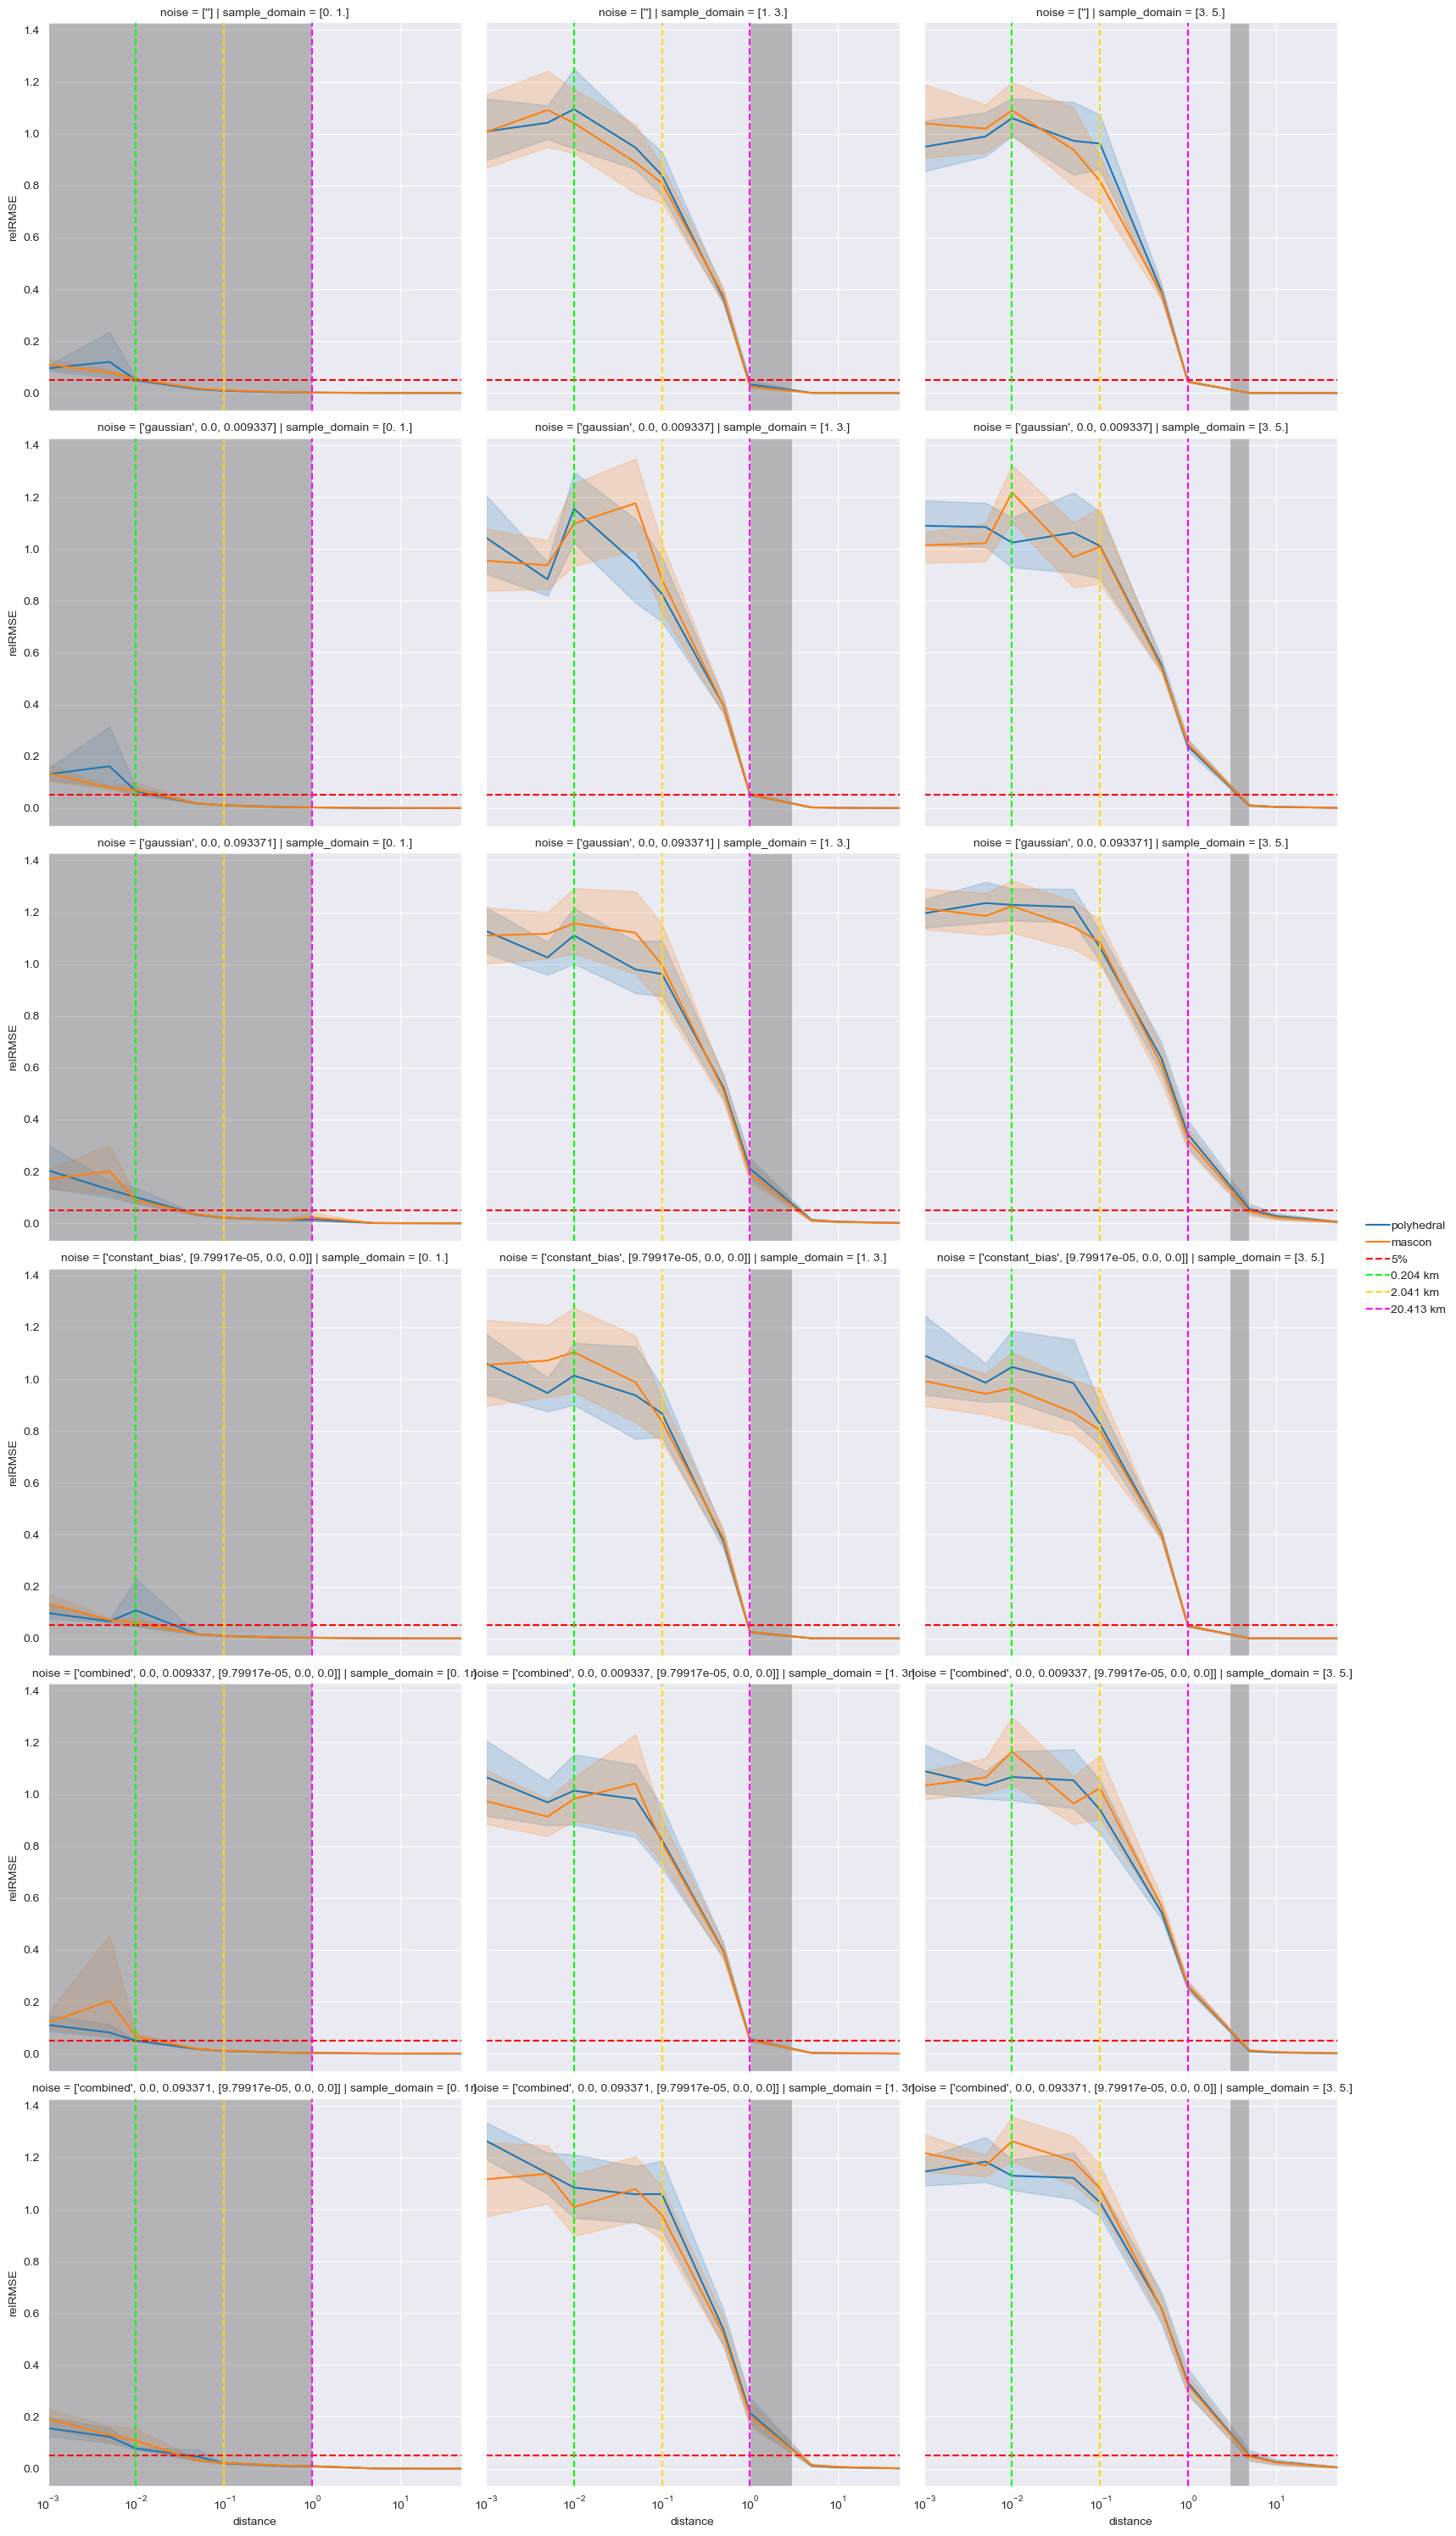

In [11]:
g = sns.relplot(
    data=dfm, kind="line",
    x="distance", y=error_of_interest, col="sample_domain", row="noise",
    hue="ground_truth"
)
g.set(xlim=(0.0, 50.0), xscale='log')
g.map(plt.axhline, y=0.05, ls='--', c='red', label="5%")
g.map(plt.axvline, x=0.01, ls='--', c='lime', label="0.204 km")
g.map(plt.axvline, x=0.1, ls='--', c='gold', label="2.041 km")
g.map(plt.axvline, x=1.0, ls='--', c='fuchsia', label="20.413 km")

for ax in g.axes[:,0]:
    ax.axvspan(0, 1.0, facecolor='gray', alpha=0.5)
for ax in g.axes[:,1]:
    ax.axvspan(1.0, 3.0, facecolor='gray', alpha=0.5)
for ax in g.axes[:,2]:
    ax.axvspan(3.0, 5.0, facecolor='gray', alpha=0.5)

# g.set_titles(col_template="{col_name} patrons", row_template="{row_name}")
# g.set(xlim=(0, 60), ylim=(0, 12), xticks=[10, 30, 50], yticks=[2, 6, 10])
g.legend.remove()
g.add_legend(handletextpad=0.1)
g.tight_layout()
save_path = os.path.join(output_directory, f"eros_norm_{error_of_interest}_line.png")
g.savefig(save_path, dpi=300)

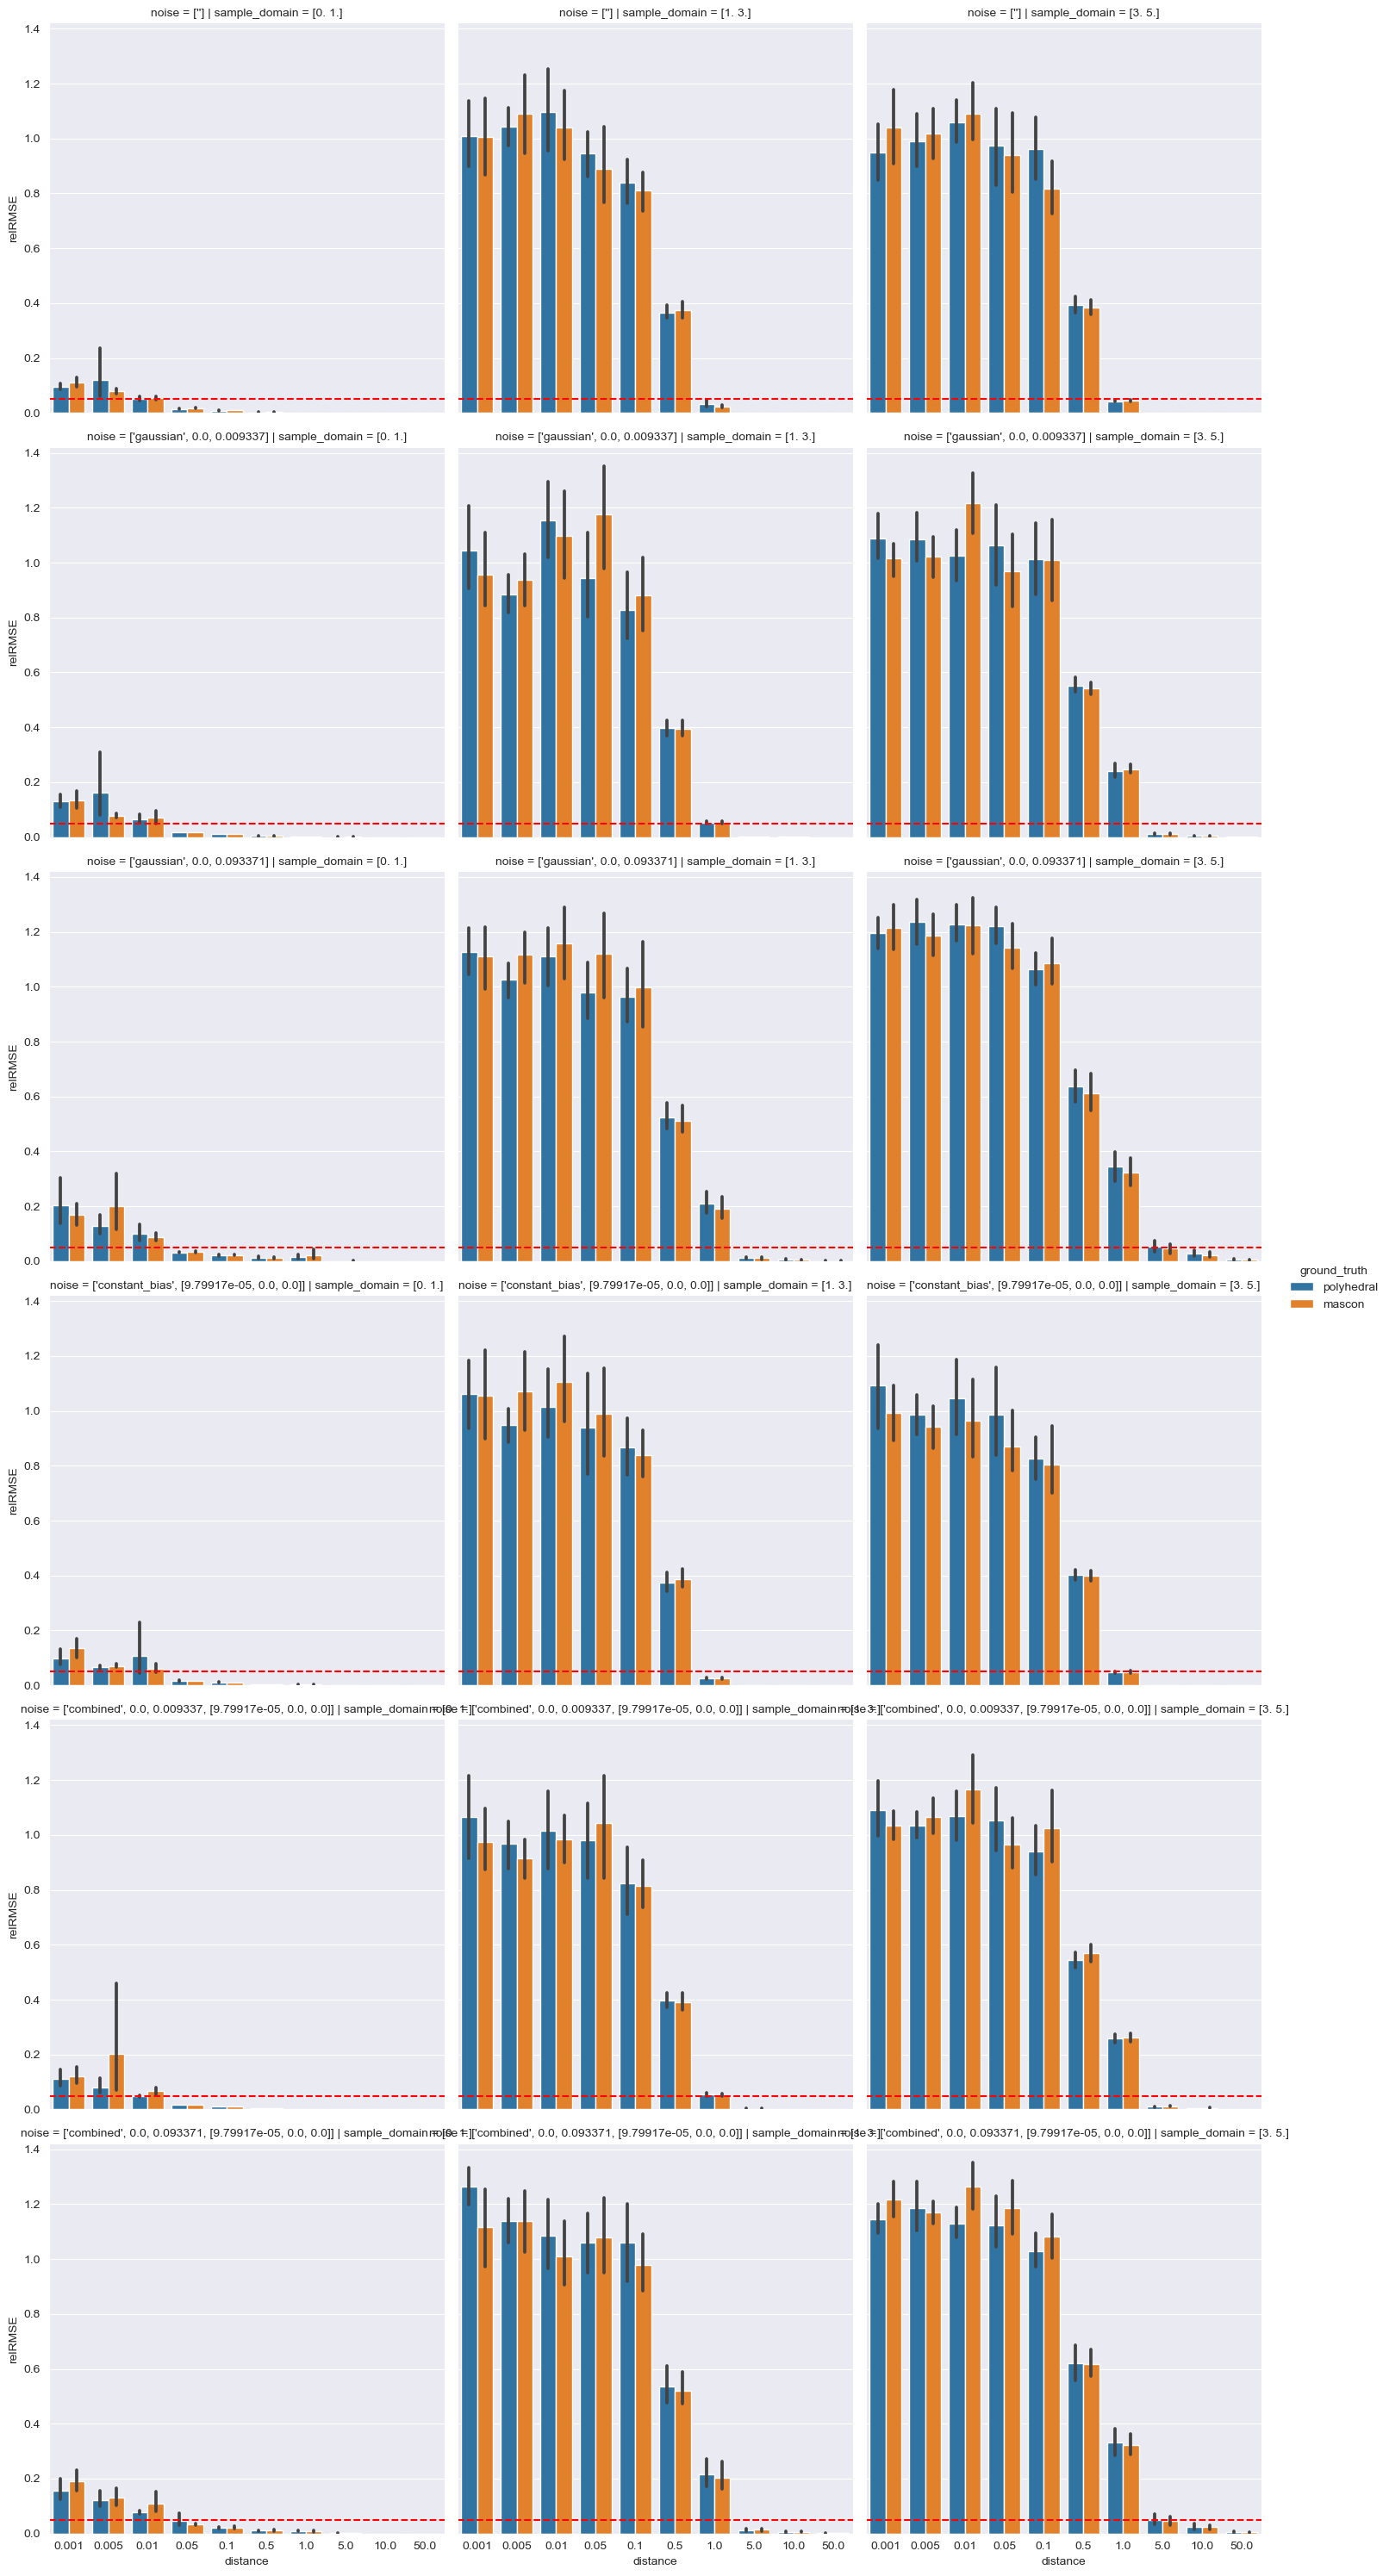

In [12]:
g = sns.catplot(
    data=dfm, kind="bar",
    x="distance", y=error_of_interest, col="sample_domain", row="noise",
    hue="ground_truth"
)
g.map(plt.axhline, y=0.05, ls='--', c='red')
# g.set_titles(col_template="{col_name} patrons", row_template="{row_name}")
# g.set(xlim=(0, 60), ylim=(0, 12), xticks=[10, 30, 50], yticks=[2, 6, 10])
g.tight_layout()
save_path = os.path.join(output_directory, f"eros_norm_{error_of_interest}_bar.png")
g.savefig(save_path, dpi=300)